In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#to see graph inside jupyter notebook itself.
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Load the Data

In [2]:
data = pd.read_csv('data_cleaned.csv')
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [3]:
data.shape

(891, 25)

## Segregating variables :Independent and dependent variables

In [4]:
#Seperateing Independent and dependent variables
x= data.drop(['Survived'],axis =1)
y=data['Survived']
x.shape,y.shape

((891, 24), (891,))

### Scaling the data(Using MinMax Scaler)

In [6]:
#Importing the MinMax scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)


In [7]:
x=pd.DataFrame(x_scaled,columns = x.columns)

In [8]:
x.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0.271174,0.014151,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.472229,0.139136,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.321438,0.015469,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.434531,0.103644,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.434531,0.015713,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Importing the train test split function

In [9]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state =56 ,stratify =y)

#Stratify means it will make sure the distribution of target class in both training and testing data is equal

## Implementing KNN Classifier

In [10]:
#Importing KNN classifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score

In [12]:
#Creating instance of KNN
clf = KNN(n_neighbors = 5)

#fitting the model
clf.fit(train_x,train_y)

#Predicting over the train set and calculating F1
test_predict = clf.predict(test_x)
k=f1_score(test_predict,test_y)
print('Test F1 Score : ',k)

Test F1 Score :  0.674698795180723


## Elbow for classifier

In [15]:
def Elbow(K):
    #Initiating empty list
    test_error =[]
    
    #Training model for every value of k
    for i in K:
        #instance on KNN
        clf = KNN(n_neighbors = i)
        clf.fit(train_x,train_y)
        #Appending F1 scores to empty list calculated using predictions
        tmp = clf.predict(test_x)
        tmp =f1_score(tmp,test_y)
        error =1-tmp
        test_error.append(error)
    return test_error   
        
        
    

In [16]:
#defining k range
k=range(6,20,2)

In [17]:
#calling abovw defined function
test=Elbow(k)

Text(0.5, 1.0, 'Elbow curve for test')

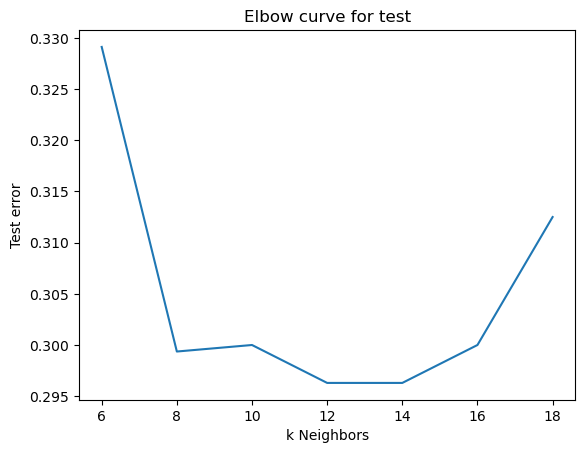

In [18]:
#plotting the curve
plt.plot(k,test)
plt.xlabel('k Neighbors')
plt.ylabel('Test error')
plt.title('Elbow curve for test')

In [19]:
#Creating instance of KNN

clf =KNN(n_neighbors = 12)

#Fitting the model
clf.fit(train_x,train_y)

#predicting over the train set and calculating F1
test_predict =clf.predict(test_x)
k=f1_score(test_predict,test_y)
print(k)

0.7037037037037037


# KNN REGRESSION

In [20]:
#Importing the data

data =pd.read_csv('train_cleaned.csv')
data.shape

(8523, 46)

### Segregating variables:Independent and Dependent variables

In [22]:
#separating independent and dependent variables

x=data.drop(['Item_Outlet_Sales'],axis =1)
y=data['Item_Outlet_Sales']
x.shape,y.shape

((8523, 45), (8523,))

### Scaling the data(Using minmax scaler)

In [23]:
#Importing minmax scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)

In [24]:
x =pd.DataFrame(x_scaled)

In [25]:
#Importing Train test split
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse

In [26]:
#Creating instance of KNN
reg =KNN(n_neighbors = 5)

#Fitting the model
reg.fit(train_x,train_y)

#Predicting over the train set and calculating MSE
test_predict =reg.predict(test_x)
k=mse(test_predict,test_y)
print('Test MSE ',k)

Test MSE  0.170762331838565


# Elbow for Classifier

In [36]:
def Elbow(K):
    #Initiating empty list
    test_mse =[]
    
    #Training model for every value of k
    for i in K:
        #instance on KNN
        reg = KNN(n_neighbors = i)
        reg.fit(train_x,train_y)
        #Appending mse to empty list calculated using predictions
        tmp = reg.predict(test_x)
        tmp = mse(tmp,test_y)
        test_mse.append(tmp)
        
    return test_mse

In [37]:
#Defining k range
k=range(1,40)

In [39]:
#Calling above defined function
test = Elbow(k)

Text(0.5, 1.0, 'Elbow Curve For test')

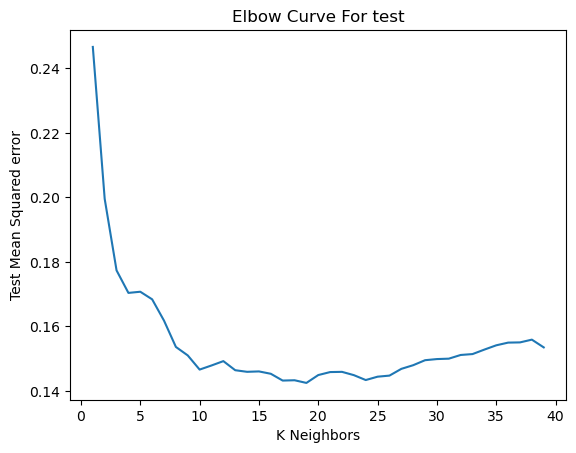

In [40]:
#Plotting the curve
plt.plot(k,test)
plt.xlabel('K Neighbors')
plt.ylabel('Test Mean Squared error')
plt.title('Elbow Curve For test')
          

In [41]:
#Creating instance of KNN
reg =KNN(n_neighbors = 9)

#Fitting the model
reg.fit(train_x,train_y)

#Predicting over the train set and calculating F1
test_predict = reg.predict(test_x)
k =mse(test_predict,test_y)
print(k)

0.1510269611913857
